In [78]:
import os
import pandas as pd
import platform
import seaborn as sns
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
import numpy as np

import scipy.stats as stats

import seaborn as sns
sns.set_context('paper')
sns.set_style('white')

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [63]:
mcc = MouseConnectivityCache(manifest_file = '..connectivity/mouse_connectivity_manifest.json',
                            resolution = 100)
st = mcc.get_structure_tree()

In [71]:
iso = st.get_structures_by_acronym(['Isocortex'])[0]
iso_mask = mcc.get_structure_mask(iso['id'])[0]

In [72]:
isid = 521255975

In [73]:
proj_grid = mcc.get_projection_density(isid)[0]
proj_grid = proj_grid*iso_mask

In [81]:
proj_grid.shape

(132, 80, 114)

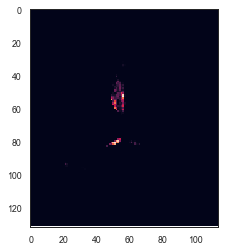

In [108]:
plt.imshow(proj_grid[:,20,:])

In [112]:
proj_grid[:,20,:].max()

0.043983847

In [111]:
proj_grid[:,20,:][50,50]

0.0004225797

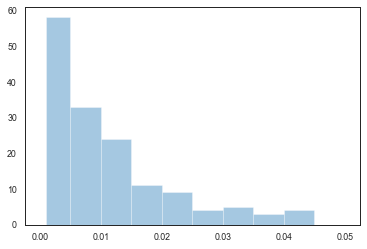

In [105]:
bins = [0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]
sns.distplot(proj_grid[:,20,:].flatten(), bins = bins, kde = False)

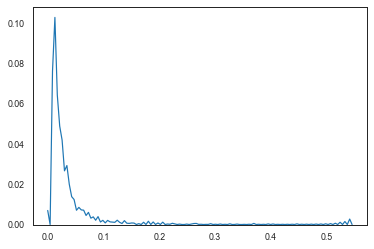

In [74]:
bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
sns.distplot(proj_grid.flatten(), bins = bins, hist = False)

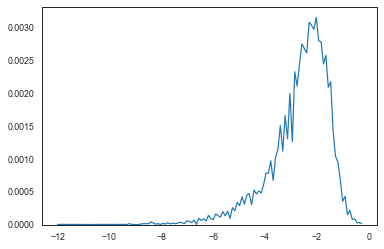

In [76]:
bins = [-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1]
sns.distplot(np.log10(proj_grid.flatten()+1e-12), bins = bins, hist = False)

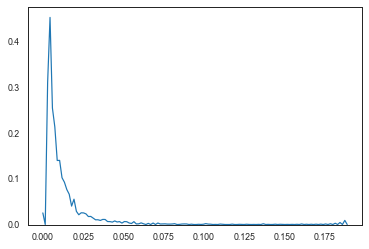

In [57]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
sns.distplot(np.log10(proj_grid.flatten()+1), bins = bins, hist = False)

In [115]:
td_experiments = pd.DataFrame(mcc.get_experiments(cre=['Ai75(RCL-nt)']))

In [117]:
td_ids = td_experiments['id'].unique()

In [235]:
all_voxels = []
valid_voxels = []
percentile = []
for isid in td_ids:
    proj_grid = mcc.get_projection_density(isid)[0]
    proj_grid = proj_grid*iso_mask
    all_voxels.append(proj_grid.flatten())
    proj_grid[np.where(proj_grid < 6e-3)] = 0
    valid_voxels.append(proj_grid[proj_grid > 0])
    percentile.append(np.percentile(proj_grid, 95))

In [236]:
all_voxels = [item for sublist in all_voxels for item in sublist]
valid_voxels = [item for sublist in valid_voxels for item in sublist]

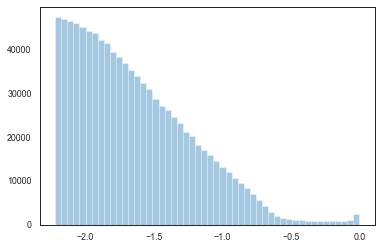

In [237]:
sns.distplot(np.log10(valid_voxels), kde = False)

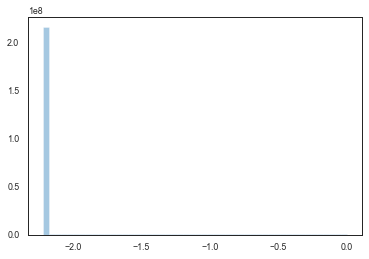

In [238]:
sns.distplot([np.log10(voxel + 6e-3) for voxel in all_voxels], kde = False)

In [211]:
np.unique(percentile)

array([0.])

In [204]:
np.mean(percentile)

0.0009402876065591363

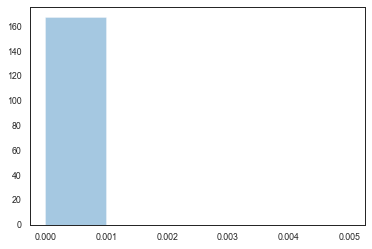

In [205]:
bins = [0, 1e-3, 2e-3, 3e-3, 4e-3, 5e-3]
sns.distplot(percentile, bins = bins, kde = False)

In [191]:
proj_grid[np.where(proj_grid < 1e-3)] = 0

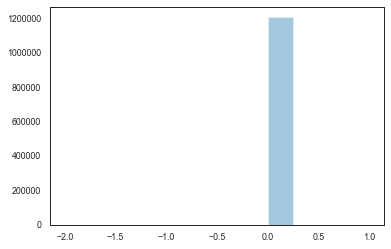

In [192]:
bins = [-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
sns.distplot(proj_grid.flatten(), bins = bins, kde = False)

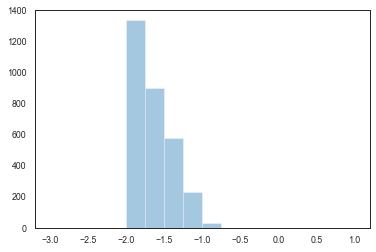

In [193]:
bins = [-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
sns.distplot(np.log10(proj_grid.flatten()+1e-3), bins = bins, kde = False)